In [1]:
import pandas as pd
police_killings = pd.read_csv('police_killings.csv', encoding='ISO-8859-1')
police_killings.columns
police_killings.head(5)

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


In [2]:
police_killings['raceethnicity'].value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: raceethnicity, dtype: int64

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n_groups = len(police_killings['raceethnicity'].unique())

index = np.arange(n_groups)
height = police_killings['raceethnicity'].value_counts()
bar_width = 0.35

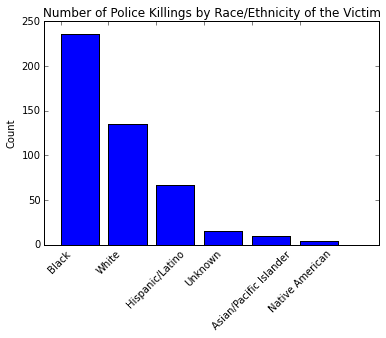

In [4]:
plt.bar(index +bar_width, height)
plt.xticks(index+bar_width, (police_killings['raceethnicity'].unique()), rotation=45)
plt.ylabel('Count')
plt.title('Number of Police Killings by Race/Ethnicity of the Victim')
plt.show()

From the graph above, it looks like the majority of killings were of black victims. To see how these numbers compare to the proportion of the total population for that race/ethnicity, they need to be normalized to the total population number for each group. 

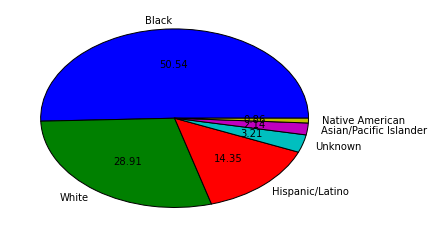

In [5]:
plt.pie(police_killings['raceethnicity'].value_counts(), labels=police_killings['raceethnicity'].unique(), autopct='%.2f')
plt.show()

([<matplotlib.patches.Wedge at 0x7f1fc0105e48>,
  <matplotlib.text.Text at 0x7f1fc01bc828>])

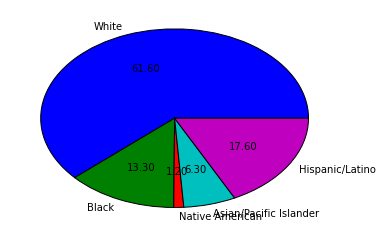

In [6]:
#total population percent of each racial/ethnic group
race_num = [ 61.6,  13.3,  1.2,  6.3,  17.6]
race_labels = ['White', 'Black','Native American', 'Asian/Pacific Islander', 'Hispanic/Latino']
plt.pie(race_num, labels=race_labels, autopct='%.2f')

The p_income column is median personal income by 
census area. Looking at this will tell us if more of 
the shootings happened in less affluent areas or more 
affluent areas.



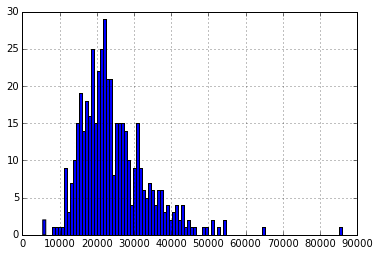

In [7]:
income = police_killings['p_income']
income = income[income != '-']
income = income.astype('float64')

income.hist(bins=100)
plt.show()


In 2014 the US median income was $51,939. The majority of police killings occur in areas below the median income level.  

In [8]:
state_pop = pd.read_csv('state_population.csv')
counts = police_killings['state_fp'].value_counts()

In [9]:
states = pd.DataFrame({'STATE': counts.index, 'shootings': counts})

In [10]:
states = state_pop.merge(states, on="STATE")

In [11]:
states['pop_millions'] = states['POPESTIMATE2015'] / 1000000

In [12]:
states['rate'] = states['shootings'] / states['pop_millions']

In [13]:
states.sort('rate', ascending=False)

/opt/dsserver/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,shootings,pop_millions,rate
35,40,3,7,40,Oklahoma,3911338,2950017,75.4,22,3.911338,5.624674
2,40,4,8,4,Arizona,6828065,5205215,76.2,25,6.828065,3.661359
27,40,2,4,31,Nebraska,1896190,1425853,75.2,6,1.896190,3.164240
11,40,4,9,15,Hawaii,1431603,1120770,78.3,4,1.431603,2.794071
1,40,4,9,2,Alaska,738432,552166,74.8,2,0.738432,2.708442
12,40,4,8,16,Idaho,1654930,1222093,73.8,4,1.654930,2.417021
31,40,4,8,35,New Mexico,2085109,1588201,76.2,5,2.085109,2.397956
18,40,3,7,22,Louisiana,4670724,3555911,76.1,11,4.670724,2.355095
5,40,4,8,8,Colorado,5456574,4199509,77.0,12,5.456574,2.199182
7,40,3,5,10,Delaware,945934,741548,78.4,2,0.945934,2.114312


Going by shooting rate, states that had the highest shooting rates were less populated and located in the Midwest and West. The states with the lowest rates, barring Iowa, were densely populated states located on the East Coast. This might have to do with tighter gun restrictions on police in densely populated areas like these states. 

In [25]:
lowest = [9,42,19, 36, 25, 33, 23, 17, 39, 55]

lowest_rates = police_killings[police_killings['state_fp'].isin(lowest) == True]

highest = [40,4,31,15,2,16,35,22,8,10]
highest_rates = police_killings[police_killings['state_fp'].isin(highest) == True]
highest_rates.describe()

,day,year,latitude,longitude,state_fp,county_fp,tract_ce,geo_id,county_id,pop,h_income,county_income,comp_income,county_bucket,nat_bucket,urate,college
count,93.000000,93.0,93.000000,93.000000,93.000000,93.000000,93.000000,9.300000e+01,93.000000,93.000000,92.000000,93.000000,92.000000,84.000000,92.000000,92.000000,92.000000
mean,15.677419,2015.0,35.631142,-105.733698,19.645161,46.139785,245194.462366,1.969155e+10,19691.301075,4269.344086,43327.152174,48702.172043,0.899455,2.476190,2.260870,0.102894,0.222367
std,8.992946,0.0,5.938627,15.626754,14.678915,41.976337,367943.438851,1.470474e+10,14704.718133,2100.699519,17537.586163,9785.696088,0.334014,1.366344,1.175478,0.060407,0.141249
min,1.000000,2015.0,19.915194,-159.642700,2.000000,1.000000,100.000000,2.020001e+09,2020.000000,0.000000,15293.000000,25498.000000,0.330230,1.000000,1.000000,0.011335,0.035051
25%,7.000000,2015.0,33.326981,-111.800605,4.000000,13.000000,2500.000000,4.021002e+09,4021.000000,2868.000000,32661.000000,42987.000000,0.646915,1.000000,1.000000,0.061613,0.120773
50%,16.000000,2015.0,35.204090,-104.909360,16.000000,27.000000,21903.000000,1.602702e+10,16027.000000,4232.000000,40000.000000,48801.000000,0.856491,2.000000,2.000000,0.091571,0.190532
75%,24.000000,2015.0,38.446102,-95.992844,35.000000,71.000000,388200.000000,3.502796e+10,35027.000000,5375.000000,54261.000000,53596.000000,1.081454,4.000000,3.000000,0.129310,0.272237
max,30.000000,2015.0,61.218408,-75.456352,40.000000,143.000000,980000.000000,4.014301e+10,40143.000000,13561.000000,111464.000000,77454.000000,2.308703,5.000000,5.000000,0.324444,0.824971


In [62]:
columns =['share_white', 'share_black', 'share_hispanic']
#pk = police_killings[police_killings[columns] != '-']
pk_highest = highest_rates[highest_rates[columns] != '-']
pk_lowest = lowest_rates[lowest_rates[columns] != '-']

In [70]:
pk_lowest = pk_lowest[columns].astype('float64')
pk_highest = pk_highest[columns].astype('float64')
print(np.mean(pk_lowest['share_white']))





60.132727272727273

In [33]:
import numpy as np
race_makeup_low10 = [np.mean(lowest_rates_racial['share_white']),np.mean(lowest_rates_racial['share_black']), np.mean(lowest_rates_racial['share_hispanic'])]
race_makeup_high10 = [np.mean(highest_rates_racial['share_white']),np.mean(highest_rates_racial['share_black']), np.mean(highest_rates_racial['share_hispanic'])]

In [37]:
lowest_rates_racial

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
